In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
out_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation"

In [3]:
cf_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/otfm/zebrafish/full_gene_f"
id_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/identity/zebrafish/single_condition_identity_from_same_timepoint"
tp_dir = "/lustre/groups/ml01/workspace/ot_perturbation/models/identity/zebrafish/single_condition_displacement_vector_same_timepoint"

In [4]:
ood_conditions = ['zc4h2_control_24','met_control_36','tfap2a_control_72','hgfa_control_48','tfap2a_foxd3_72','noto_control_18','cdx4_cdx1a_36','epha4a_control_48','mafba_control_36','tbx16_msgn1_24','noto_control_24','smo_control_18','hand2_control_24','noto_control_36','egr2b_control_36','cdx4_control_18','tfap2a_control_36','foxi1_control_72','egr2b_control_24','cdx4_control_36','zc4h2_control_36','hoxb1a_control_48','tfap2a_foxd3_36','tbx16_tbx16l_24','smo_control_36','mafba_control_18','hgfa_control_72','tbx16_control_18','mafba_control_24','tbx1_control_36','zc4h2_control_48','wnt3a_wnt8_36','foxi1_control_48','smo_control_24','noto_control_48','mafba_control_48','tfap2a_control_48','hand2_control_48','egr2b_control_48','phox2a_control_48','tbx1_control_48','tbx16_msgn1_36','foxd3_control_72','wnt3a_wnt8_24','egr2b_control_18','wnt3a_wnt8_18','met_control_72','phox2a_control_36','epha4a_control_24','foxd3_control_36','tfap2a_foxd3_48','hand2_control_36','cdx4_cdx1a_24','hgfa_control_36','tbx16_tbx16l_18','tbxta_control_36','cdx4_control_24','foxd3_control_48','met_control_48','tbx1_control_24','epha4a_control_36','cdx4_cdx1a_18','tbx16_control_36','tbx16_tbx16l_36','tbx16_control_24','tbxta_control_24','tbx16_msgn1_18','epha4a_control_18','tbxta_control_18','hoxb1a_control_36','hoxb1a_control_24']
      

In [5]:
dfs = []
for ood_cond in ood_conditions:
    csv_file = [el for el in os.listdir(id_dir) if ((ood_cond in el) and ("csv" in el))]
    assert len(csv_file) == 1
    df = pd.read_csv(os.path.join(id_dir, csv_file[0])).set_index("Unnamed: 0").T
    df["condition"] = f"{ood_cond}"
    dfs.append(df)

In [6]:
df_id = pd.concat(dfs)

In [7]:
dfs = []
for ood_cond in ood_conditions:
    csv_file = [el for el in os.listdir(cf_dir) if ((ood_cond in el) and ("csv" in el))]
    if len(csv_file) == 0:
        continue
    assert len(csv_file) == 1
    df = pd.read_csv(os.path.join(cf_dir, csv_file[0])).set_index("Unnamed: 0").T
    df["condition"] = f"{ood_cond}"
    dfs.append(df)

In [8]:
df_cf = pd.concat(dfs)

In [9]:
dfs = []
for ood_cond in ood_conditions:
    csv_file = [el for el in os.listdir(tp_dir) if ((ood_cond in el) and ("csv" in el))]
    assert len(csv_file) == 1
    df = pd.read_csv(os.path.join(tp_dir, csv_file[0])).set_index("Unnamed: 0").T
    df["condition"] = f"{ood_cond}"
    dfs.append(df)

In [10]:
df_tp = pd.concat(dfs)

In [11]:
df_id["model"]="id"
df_cf["model"]="cf"
df_tp["model"]="same_timepoint"

/tmp/ipykernel_898981/2090703474.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_id["model"]="id"
/tmp/ipykernel_898981/2090703474.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cf["model"]="cf"
/tmp/ipykernel_898981/2090703474.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tp[

In [12]:
df_all = pd.concat((df_id, df_cf, df_tp))

In [13]:
df_all.to_csv(os.path.join(out_dir, "results_allocated_full_gene.csv"))

<Axes: xlabel='model', ylabel='ood_mmd'>

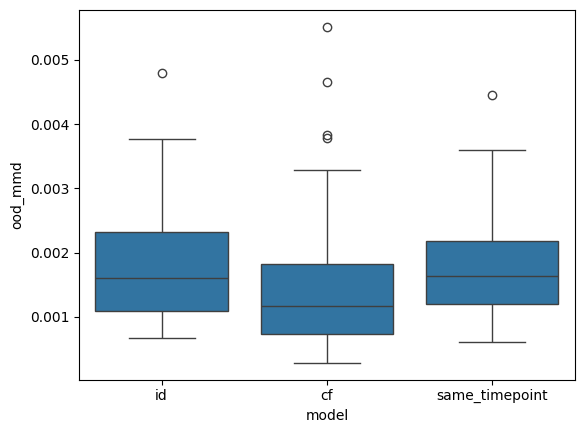

In [14]:
sns.boxplot(df_all, x="model", y="ood_mmd")

<Axes: xlabel='model', ylabel='ood_e_distance'>

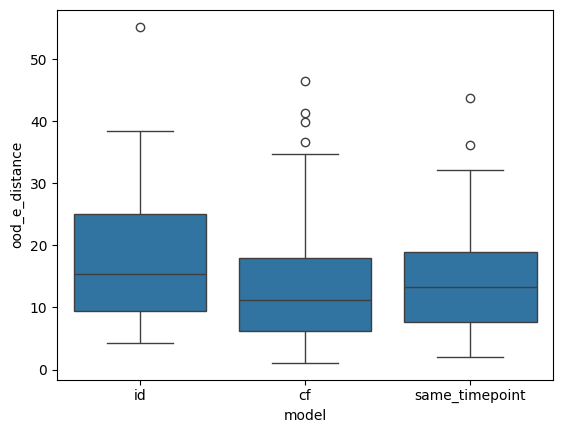

In [15]:
sns.boxplot(df_all, x="model", y="ood_e_distance")

<Axes: xlabel='model', ylabel='ood_sdiv_100'>

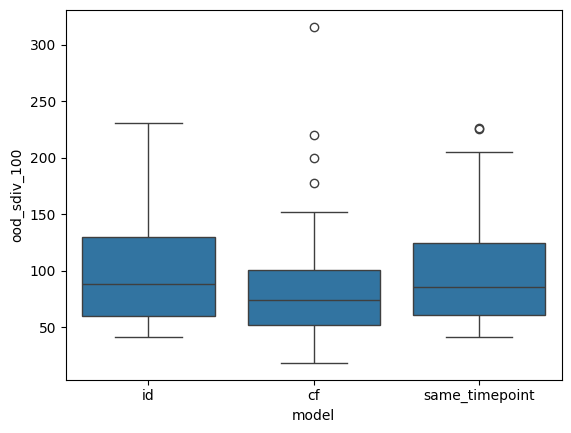

In [16]:
sns.boxplot(df_all, x="model", y="ood_sdiv_100")

<Axes: xlabel='model', ylabel='cell_type_fraction_error'>

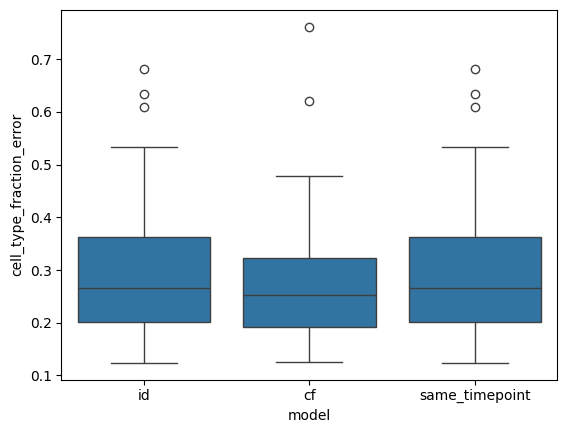

In [17]:
sns.boxplot(df_all, x="model", y="cell_type_fraction_error")

<Axes: xlabel='model', ylabel='fraction_cell_types_covered'>

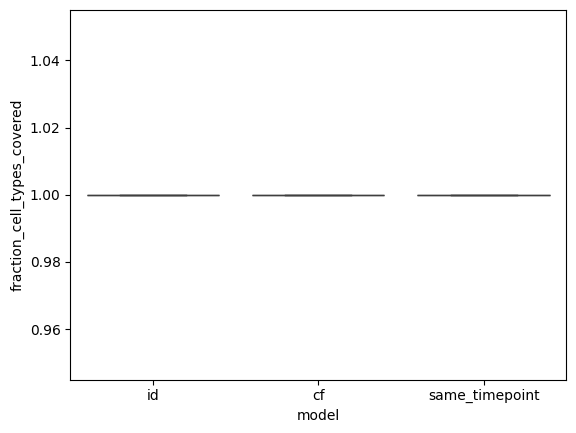

In [18]:
sns.boxplot(df_all, x="model", y="fraction_cell_types_covered")

<Axes: xlabel='model', ylabel='mean_e_distance_per_cell_type'>

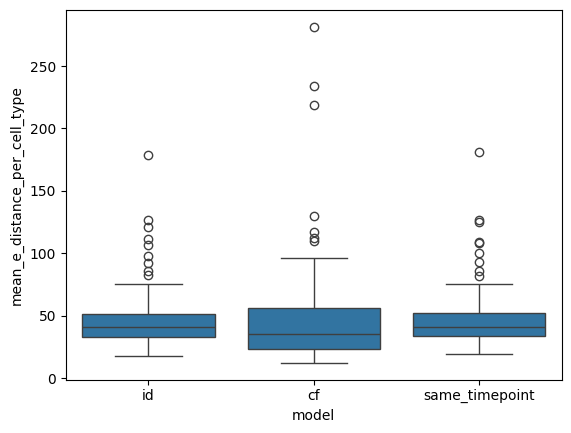

In [19]:
sns.boxplot(df_all, x="model", y="mean_e_distance_per_cell_type")

<Axes: xlabel='model', ylabel='mean_mmd_per_cell_type'>

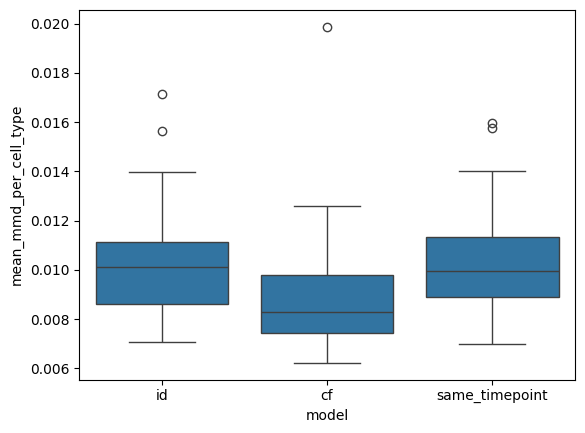

In [20]:
sns.boxplot(df_all, x="model", y="mean_mmd_per_cell_type")

In [21]:
df_all.groupby("model")["cell_type_fraction_error"].mean()

model
cf                0.276157
id                0.299493
same_timepoint    0.299493
Name: cell_type_fraction_error, dtype: float64

In [22]:
df_all["timepoint"] = df_all.apply(lambda x: x["condition"].split("_")[-1], axis=1)

/tmp/ipykernel_898981/931513311.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all["timepoint"] = df_all.apply(lambda x: x["condition"].split("_")[-1], axis=1)


In [23]:
df_all["gene_target"] = df_all.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)

/tmp/ipykernel_898981/1223501246.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all["gene_target"] = df_all.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)


In [24]:
df_all["gene_target"]

zc4h2_control_24      zc4h2_control
met_control_36          met_control
tfap2a_control_72    tfap2a_control
hgfa_control_48        hgfa_control
tfap2a_foxd3_72        tfap2a_foxd3
                          ...      
tbx16_msgn1_18          tbx16_msgn1
epha4a_control_18    epha4a_control
tbxta_control_18      tbxta_control
hoxb1a_control_36    hoxb1a_control
hoxb1a_control_24    hoxb1a_control
Name: gene_target, Length: 213, dtype: object

In [25]:
df_all["model"].unique()

array(['id', 'cf', 'same_timepoint'], dtype=object)

In [133]:
none_seen = []
one_seen = []
both_seen = []
for g in gts:
    gt1, gt2 = g.split("_")
    other_gts = []
    for el in gts:
        if el == g:
            continue
        gt1_other, gt2_other = el.split("_")
        other_gts += [gt1_other, gt2_other]
    if gt2 =="control":

        if gt1 in other_gts:
            one_seen.append(g)
            continue
        else:
            none_seen.append(g)
            continue
    if gt1 in other_gts and gt2 in other_gts:
        both_seen.append(g)
        continue
    if gt1 in other_gts or gt2 in other_gts:
        one_seen.append(g)
        continue
    
    none_seen.append(g)
    
def get_group(x):
    if x["gene_target"] in none_seen:
        return "0"
    if x["gene_target"] in one_seen:
        return "1"
    return "2"

In [134]:
import numpy as np
df_metric_cf = pd.melt(df_all[df_all["model"]=="cf"], id_vars=["timepoint", "gene_target"], value_vars="ood_e_distance")
df_metric_id = pd.melt(df_all[df_all["model"]=="id"], id_vars=["timepoint", "gene_target"], value_vars="ood_e_distance")
df_metric_cf["improvement"] = np.log2(df_metric_id["value"]) - np.log2(df_metric_cf["value"])
df_metric_cf["group"] = df_metric_cf.apply(get_group, axis=1)
df_metric_cf.to_csv(os.path.join(out_dir, "results_full_gene_e_distance_per_condition.csv"))

In [135]:
df_metric_cf = pd.melt(df_all[df_all["model"]=="cf"], id_vars=["timepoint", "gene_target"], value_vars="ood_mmd")
df_metric_id = pd.melt(df_all[df_all["model"]=="id"], id_vars=["timepoint", "gene_target"], value_vars="ood_mmd")
df_metric_cf["improvement"] = np.log2(df_metric_id["value"]) - np.log2(df_metric_cf["value"])
df_metric_cf["group"] = df_metric_cf.apply(get_group, axis=1)
df_metric_cf.to_csv(os.path.join(out_dir, "results_full_gene_mmd_per_condition.csv"))

In [136]:
df_metric_cf = pd.melt(df_all[df_all["model"]=="cf"], id_vars=["timepoint", "gene_target"], value_vars="cell_type_fraction_error")
df_metric_id = pd.melt(df_all[df_all["model"]=="id"], id_vars=["timepoint", "gene_target"], value_vars="cell_type_fraction_error")
df_metric_cf["improvement"] = np.log2(df_metric_id["value"]) - np.log2(df_metric_cf["value"])
df_metric_cf["group"] = df_metric_cf.apply(get_group, axis=1)
df_metric_cf.to_csv(os.path.join(out_dir, "results_full_gene_cell_type_fraction_error_per_condition.csv"))

In [137]:
gts = df_all["gene_target"].unique()

In [138]:
gts_ordered = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered2.csv", index_col=0)


In [139]:
gts_ordered = list(gts_ordered[["gene_target"]].drop_duplicates().values.squeeze())

In [140]:
gt_new_order = [el for el in gts_ordered if el in none_seen] + [el for el in gts_ordered if el in one_seen] + [el for el in gts_ordered if el in both_seen]


In [141]:
gt_new_order

['hand2_control',
 'tbx1_control',
 'smo_control',
 'noto_control',
 'tbxta_control',
 'wnt3a_wnt8',
 'met_control',
 'foxi1_control',
 'hgfa_control',
 'phox2a_control',
 'zc4h2_control',
 'egr2b_control',
 'epha4a_control',
 'hoxb1a_control',
 'mafba_control',
 'tbx16_tbx16l',
 'tbx16_control',
 'tbx16_msgn1',
 'cdx4_cdx1a',
 'cdx4_control',
 'tfap2a_control',
 'foxd3_control',
 'tfap2a_foxd3']

In [142]:
both_seen

['tfap2a_foxd3']